# 로이터 뉴스 데이터셋

케라스의 [tf.keras.datasets.reuters](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/reuters)로부터 로이터 뉴스 데이터셋을 불러오겠습니다.  
역시 등장빈도가 10,000등안에 들지 않는 단어들은 `<UNKNOWN>`으로 전처리하겠습니다.
- 로이터 뉴스 기사 11,228개
- 훈련용 : 8,982개, 테스트용 : 2,246개
- 46개의 주제로 분류되며 라벨은 0부터 45
- 주제별 기사 개수는 편차가 큼  
![](https://drive.google.com/thumbnail?id=1ELjNVEQLqoPw7g6TXLINYz0seROlrJd0&sz=s4000)

In [2]:
from tensorflow import keras
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(f"훈련용 : {len(train_data)}")
print(f"테스트용 : {len(test_data)}")

훈련용 : 8982
테스트용 : 2246


0부터 45까지의 라벨은 다음 주제와 대응합니다.

In [3]:
class_names = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
                'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
                'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
                'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
                'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

주제별 기사 개수는 편차가 매우 큽니다.

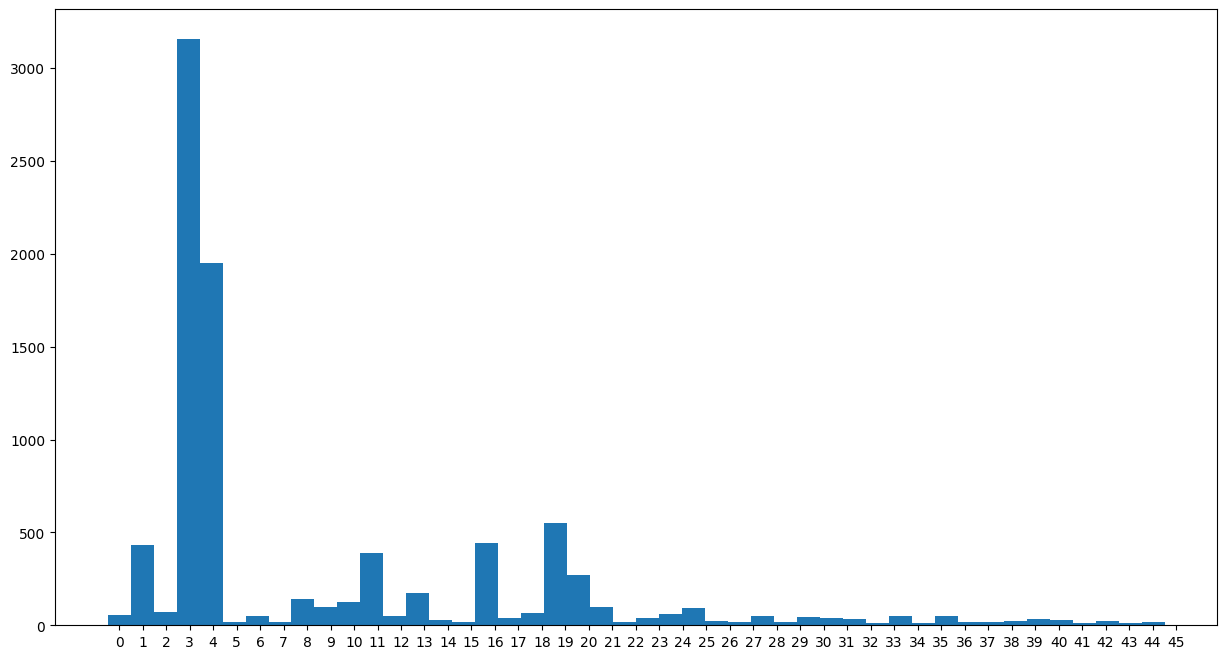

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.hist(train_labels, bins=46, align='left')
plt.xticks(range(46))
plt.show()

**[실습1] (10분) key를 class_names의 항목으로 value를 해당 기사 개수로 가지는 딕셔너리를 출력하시오.**

In [5]:
import numpy as np

cnt = {}
for i in range(46):
    cnt[class_names[i]] = np.sum(train_labels == i)

print(cnt)
    

{'cocoa': 55, 'grain': 432, 'veg-oil': 74, 'earn': 3159, 'acq': 1949, 'wheat': 17, 'copper': 48, 'housing': 16, 'money-supply': 139, 'coffee': 101, 'sugar': 124, 'trade': 390, 'reserves': 49, 'ship': 172, 'cotton': 26, 'carcass': 20, 'crude': 444, 'nat-gas': 39, 'cpi': 66, 'money-fx': 549, 'interest': 269, 'gnp': 100, 'meal-feed': 15, 'alum': 41, 'oilseed': 62, 'gold': 92, 'tin': 24, 'strategic-metal': 15, 'livestock': 48, 'retail': 19, 'ipi': 45, 'iron-steel': 39, 'rubber': 32, 'heat': 11, 'jobs': 50, 'lei': 10, 'bop': 49, 'zinc': 19, 'orange': 19, 'pet-chem': 24, 'dlr': 36, 'gas': 30, 'silver': 13, 'wpi': 21, 'hog': 12, 'lead': 18}


첫번째 훈련 데이터입니다.  
원래는 영문 기사인데 이미 전처리되어 정수열로 저장되어 있습니다.

In [6]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


무슨 말인지는 모르겠지만 주제가 earn이라네요.

In [7]:
print(class_names[train_labels[0]])

earn


영어를 인덱스로 바꾸는 사전을 불러오겠습니다.  
얼마나 자주 등장하느냐로 어휘에 인덱스를 부여합니다.  
인덱스는 1부터 출발합니다.

In [8]:
word_index = reuters.get_word_index()
print(word_index)

{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 16266, 'slickline': 20692, 'doldrums': 13799, 'kids': 12092, 'cl

위에서 키와 밸류를 바꾼 딕셔너리를 만들겠습니다.  
인덱스를 영어로 바꾸는데 필요한 사전입니다.

In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(reverse_word_index)

{10996: 'mdbl', 16260: 'fawc', 12089: 'degussa', 8803: 'woods', 13796: 'hanging', 20672: 'localized', 20673: 'sation', 20675: 'chanthaburi', 10997: 'refunding', 8804: 'hermann', 20676: 'passsengers', 20677: 'stipulate', 8352: 'heublein', 20713: 'screaming', 16261: 'tcby', 185: 'four', 1642: 'grains', 20680: 'broiler', 12090: 'wooden', 1220: 'wednesday', 13797: 'highveld', 7593: 'duffour', 20681: '0053', 3914: 'elections', 2563: '270', 3551: '271', 5113: '272', 3552: '273', 3400: '274', 7975: 'rudman', 3401: '276', 3478: '277', 3632: '278', 4309: '279', 9381: 'dormancy', 7247: 'errors', 3086: 'deferred', 20683: 'sptnd', 8805: 'cooking', 20684: 'stratabit', 16262: 'designing', 20685: 'metalurgicos', 13798: 'databank', 20686: '300er', 20687: 'shocks', 7972: 'nawg', 20688: 'tnta', 20689: 'perforations', 2891: 'affiliates', 20690: '27p', 16263: 'ching', 595: 'china', 16264: 'wagyu', 3189: 'affiliated', 16265: 'chino', 16266: 'chinh', 20692: 'slickline', 13799: 'doldrums', 12092: 'kids', 302

등장빈도 톱 20위 어휘들입니다.  
일상적으로 많이 쓰이는 관사, 전치사, 대명사가 보이네요.  
아무래도 경제 기사들이다보니 dlrs(=dollars), pct(=percent), mln(=million), 숫자들이 등장합니다.  
인터뷰와 인용 때문인지 said가 상위권입니다.

In [10]:
for idx in range(1,21):
    print(reverse_word_index[idx])

the
of
to
in
said
and
a
mln
3
for
vs
dlrs
it
reuter
000
1
pct
on
from
is


위 사전을 이용해서 첫번째 훈련 데이터를 디코딩해보죠.  
주의할 점은 전처리된 데이터에서 0,1,2,3은 특별 토큰을 나타냅니다.
- 0 : `<PAD>` (문장의 길이가 같아지도록 끼워넣는 더미, 여기서는 사용안함)
- 1 : `<START>` (문장의 시작을 알림)
- 2 : `<UNK>` (등장빈도가 낮은 어휘)
- 3 : `<UNUSED>`

그래서 어휘들의 인덱스가 3씩 뒤로 밀려있습니다.  
예를들어, the의 인덱스는 원래 1인데 특별 토큰때문에 3만큼 밀려서 4로 표시됩니다.  
그래서, 3을 빼준후에 어휘로 바꿔줘야 제대로 디코딩이 됩니다.  
`.get(i-3,"?")`은 i-1이 딕셔너리의 key에 없으면 ?로 대체하라는 뜻입니다.  
i가 특수토큰을 나타내는 0,1,2,3일경우는 i-3이 -3,-2,-1,0이 되어서 딕셔너리의 key에 없기 때문에 ?로 대체됩니다.  
" ".join은 리스트 안의 단어를을 이어붙이는데 사이에 따옴표안에 있는 문자인 스페이스를 끼워 넣으라는 뜻입니다.

In [11]:
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


기사마다 데이터의 길이가 다릅니다.  
이래서는 신경망의 입력 뉴런의 수가 정해질 수 없습니다.

최대 길이 : 2376
평균 길이 : 145.5398574927633
최소 길이 : 13


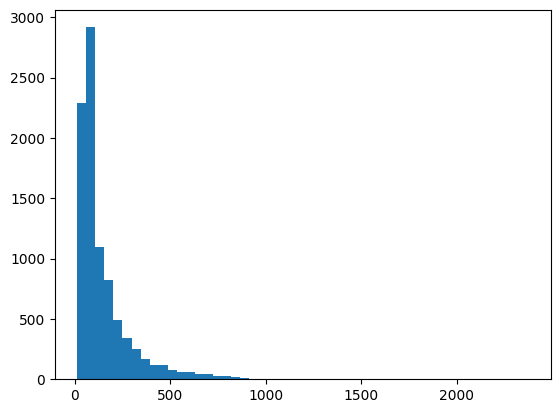

In [12]:
import numpy as np

news_length = [len(news) for news in train_data]

print(f'최대 길이 : {np.max(news_length)}')
print(f'평균 길이 : {np.mean(news_length)}')
print(f'최소 길이 : {np.min(news_length)}')

plt.hist(news_length, bins=50)
plt.show()

모두 10,000의 길이를 가지는 멀티 핫 벡터로 다시 인코딩하겠습니다.  
정수형 라벨을 그대로 사용해도 되지만 연습삼아 원 핫 인코딩한 후에 학습시키겠습니다.

In [13]:
from tensorflow.keras.utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

멀티 핫 인코딩한 첫번째 훈련 데이터입니다.

In [14]:
np.set_printoptions(linewidth=100,threshold=10000)

print(x_train[0])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.


# 다중분류

다음과 같이 신경망을 구성하겠습니다.  
![](https://drive.google.com/thumbnail?id=1r-y981q0FqfJRTUR0rgymLFpddrUnJLf&sz=s4000)

c:\Users\USER\miniconda3\envs\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


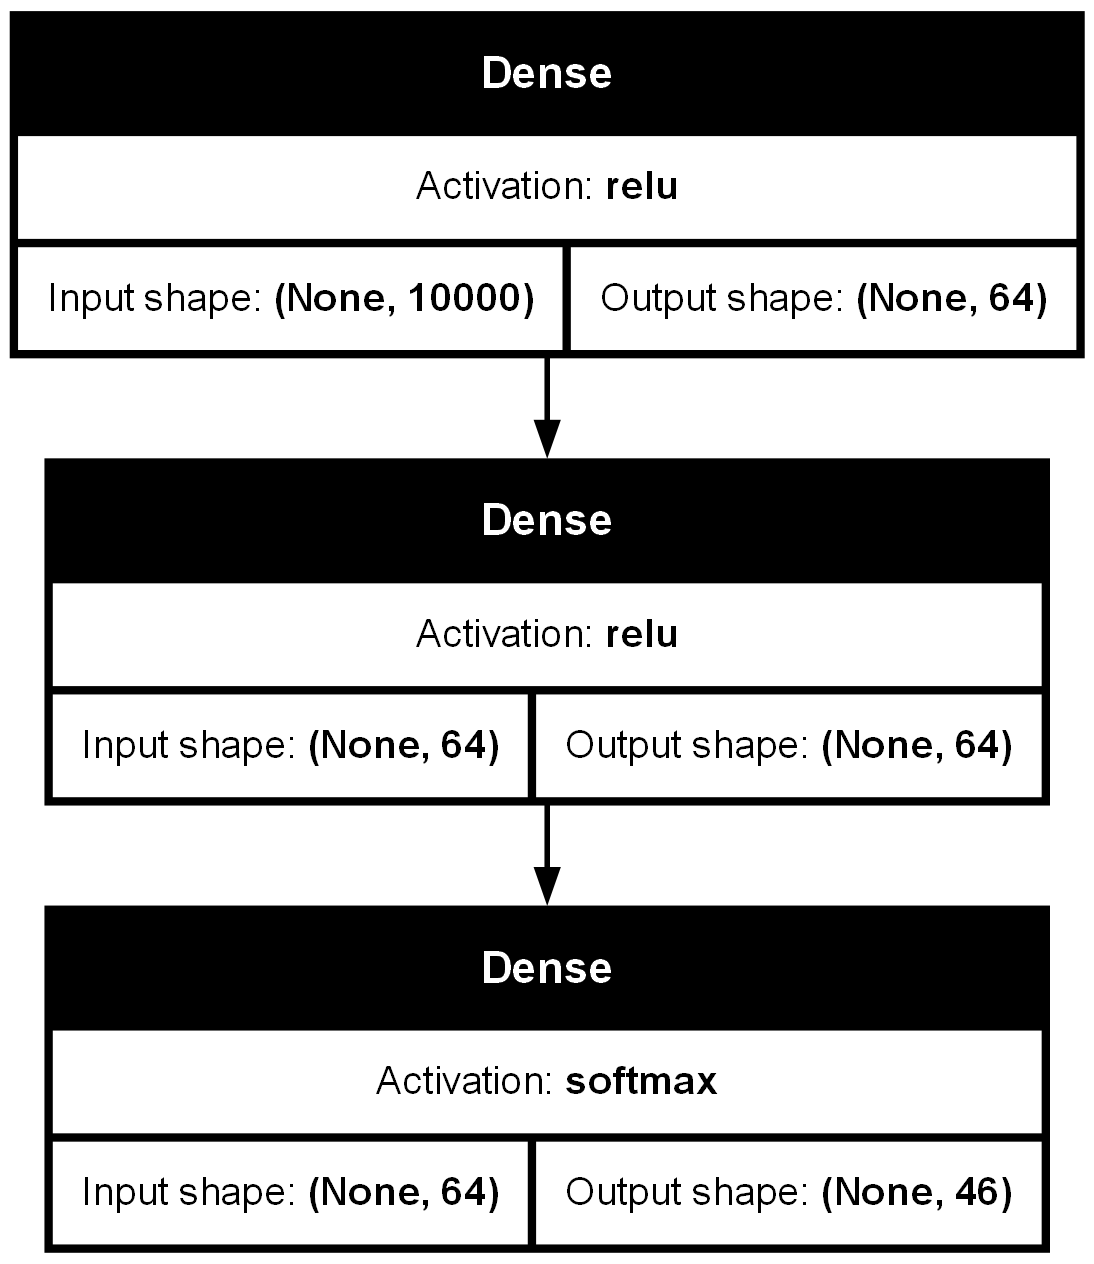

In [15]:
from keras import models
from keras.layers import Dense
from tensorflow.keras.utils import plot_model

model = keras.Sequential([
    Dense(64, input_shape=(10000,), activation="relu"),
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")
])

plot_model(model, show_shapes=True, show_layer_activations=True)

라벨을 원 핫 인코딩했기 때문에 손실함수 설정을 categorical_crossentropy로 해줍니다.

In [16]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

8,982개의 훈련 데이터를 1,000개와 7,982개로 쪼개서 전자를 검증용으로 후자를 훈련용으로 사용하겠습니다.

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

검증 데이터로 하이퍼 파라미터인 학습회수를 결정하겠습니다.  
학습회수를 넉넉히 20에폭
으로 잡고 과적합을 유도하겠습니다.

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3627 - loss: 3.2367 - val_accuracy: 0.6030 - val_loss: 1.9096
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6424 - loss: 1.7309 - val_accuracy: 0.6710 - val_loss: 1.4348
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7166 - loss: 1.3034 - val_accuracy: 0.7270 - val_loss: 1.2504
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7737 - loss: 1.0460 - val_accuracy: 0.7600 - val_loss: 1.1134
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8258 - loss: 0.8460 - val_accuracy: 0.7690 - val_loss: 1.0388
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8517 - loss: 0.7218 - val_accuracy: 0.7880 - val_loss: 0.9856
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8778 - loss: 0.5881 - val_accuracy: 0.8030 - val_loss: 0.9217
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8992 - loss: 0.4789 - val_accuracy: 0.8000 - v

대략 9에폭부터 과적합이 시작되네요.

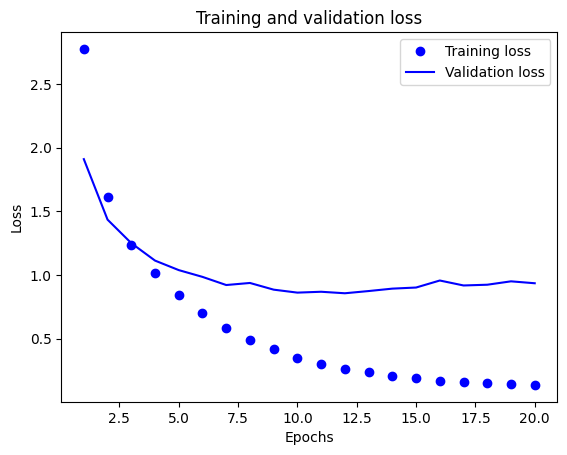

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

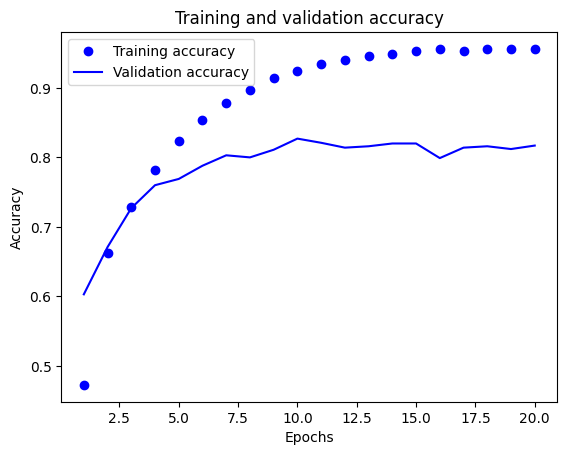

In [20]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

신경망을 초기화하고 훈련 에폭을 9로 설정합시다.  
하이퍼 파라미터 튜닝이 끝났기 때문에 처음에 주어진 훈련 데이터 전체를 사용해 학습시키겠습니다.  
46진 분류라는 점을 감안하면 최종 정확도가 매우 높게 느껴질수 있습니다.  
주제별 기사 개수가 고르다면 이는 분명 높은 정확도가 맞습니다.  
기사를 안읽고 찍었을때 대략 1/46$\approx$0.021가 나올테니까요.  
하지만 위에서 봤다시피 주제별 기사개수의 편차가 매우 큽니다.

In [21]:
model = keras.Sequential([
  Dense(64, input_shape=(10000,), activation="relu"),
  Dense(64, activation="relu"),
  Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test, y_test)
print("\n")
print(results)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3623 - loss: 3.0582
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6866 - loss: 1.5222
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7470 - loss: 1.1443
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7927 - loss: 0.9507
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8373 - loss: 0.7520
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8684 - loss: 0.6174
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8904 - loss: 0.5191
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9167 - loss: 0.4155 
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9265 - loss: 0.3488 
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8034 - loss: 0.8896


[0.9125728607177734, 0.7974176406860352]


기사 내용을 안읽고 주제를 찍는 실험을 해보겠습니다.  
주의할 점은 찍는 주제를 기사 개수만큼 답해야 합니다.  
예를 들어, cocoa는 55번 답하고 grain은 432번 답합니다.  
구현하는 아이디어는 라벨을 섞은후 원래 라벨과 순서대로 비교해서 일치하는 개수를 세는 것입니다.  
섞은 후의 리스트에 따라 순서대로 대답한다고 생각하는 것이지요.  
클래스 편차로 인해 이런 방식으로 찍을 경우 예상외로 높은 정확도가 나옵니다.  
실행할때미다 조금씩 달라지지만 무려 MNIST 경우의 두배에 가깝네요.

In [22]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18121104185218165

실행할때마다 달라지긴 하는데 첫번째 테스트 데이터에 대해서는 신경망이 3(=earn) 또는 4(=acq)중에 망설입니다.

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


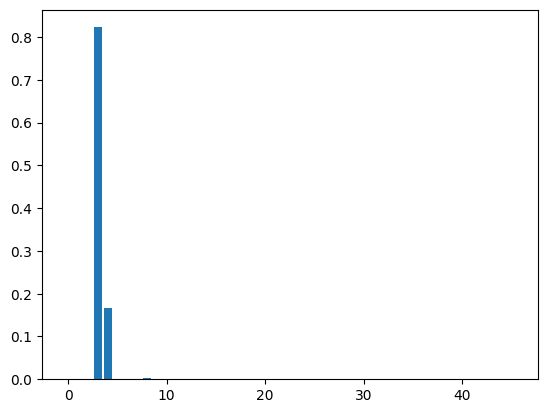

예측 주제 : earn


In [23]:
predictions = model.predict(x_test)

plt.bar(range(46), predictions[0])
plt.show()
print(f"예측 주제 : {class_names[np.argmax(predictions[0])]}")

라벨은 3(=earn)입니다.  
학습을 새로 할때마다 맞출때도 있고 틀릴때도 있습니다.  
틀릴 때는 4(=acq)라고 대답해서입니다.

In [24]:
print(f"실제 주제 : {class_names[test_labels[0]]}")
print("\n텍스트 :")
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in test_data[0]])
print(decoded_newswire)

실제 주제 : earn

텍스트 :
? the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to ? growth and expansion plans for ? inc and ? inc over the next two years a and p said the acquisition of ? in august 1986 and ? in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt ? ? of west germany reuter 3


우연이 아니라 혼동행렬을 구해보면 3를 4이라고 대답한 경우가 많습니다.

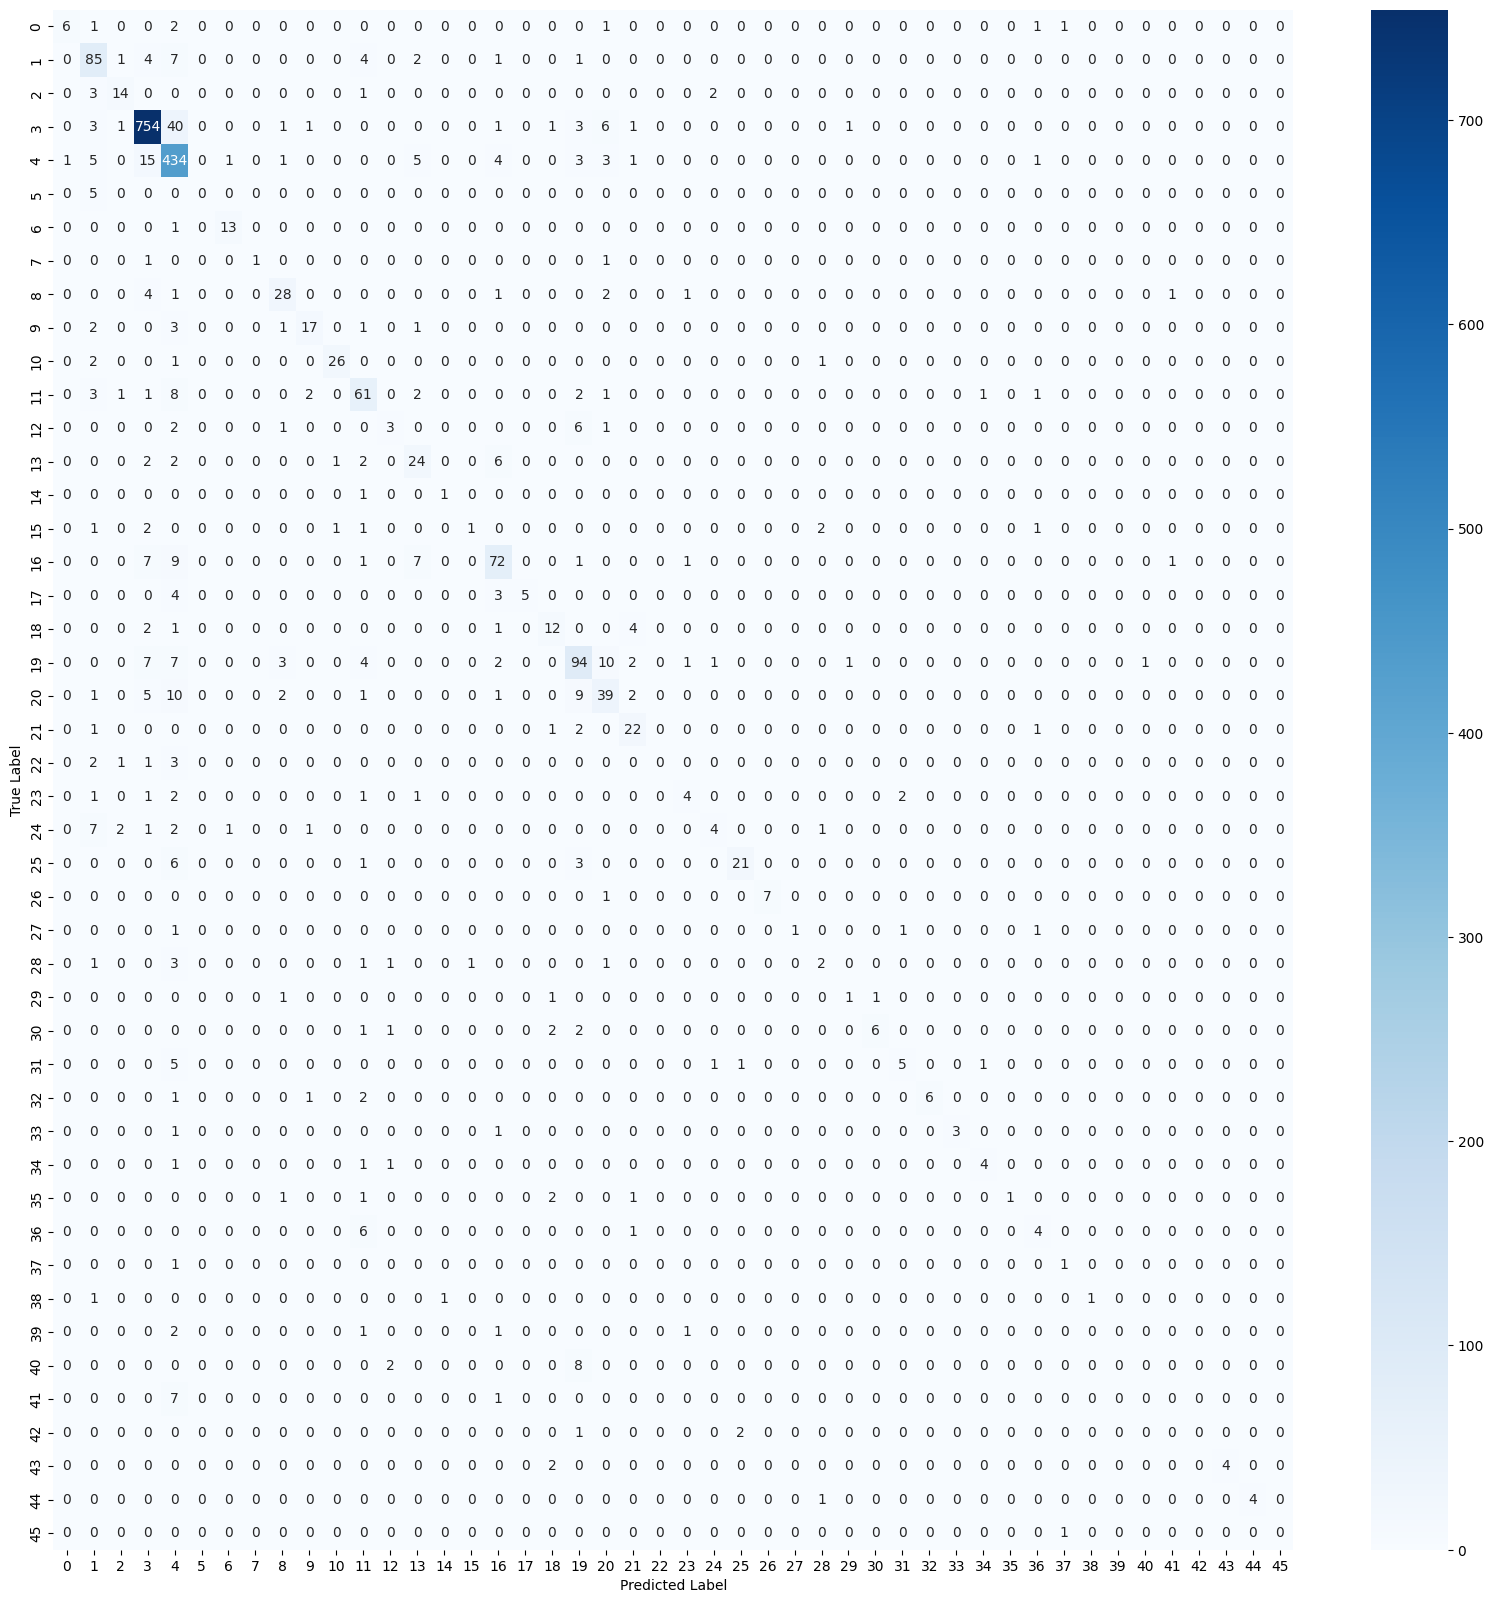

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(test_labels, np.argmax(predictions, axis=1))

plt.figure(figsize=(20,20))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, np.argmax(predictions, axis=1), zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.69      0.81      0.74       105
           2       0.70      0.70      0.70        20
           3       0.93      0.93      0.93       813
           4       0.77      0.92      0.83       474
           5       0.00      0.00      0.00         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.72      0.74      0.73        38
           9       0.77      0.68      0.72        25
          10       0.93      0.87      0.90        30
          11       0.66      0.73      0.70        83
          12       0.38      0.23      0.29        13
          13       0.57      0.65      0.61        37
          14       0.50      0.50      0.50         2
          15       0.50      0.11      0.18         9
          16       0.76      0.73      0.74        99
          17       1.00    

**[실습2] (10분) (i) 등장빈도가 100등안에 들지 못하는 단어는 `<UNK>`으로 전처리한 후 첫번째 훈련 데이터를 디코딩하여 출력하시오.**

In [27]:
(train_data_100, train_labels_100), (test_data_100, test_labels_100) = reuters.load_data(num_words=100)

decoded_newswire_100 = " ".join([reverse_word_index.get(i - 3, '?') for i in train_data_100[0]])
print(decoded_newswire_100)

? ? ? said as a ? of its ? ? of ? ? it ? ? per share in 1987 of 1 ? to 1 ? dlrs per share up from ? cts in 1986 the company said ? net ? ? to ? to 10 mln dlrs from ? mln dlrs in 1986 and ? ? ? to ? to ? mln dlrs from ? 5 mln dlrs it said ? ? per share this year ? be 2 ? to ? dlrs reuter 3


**(ii) 멀티 핫 인코딩한 후 첫번째 훈련 데이터를 출력하시오.**

In [28]:
x_train_100 = vectorize_sequences(train_data_100, dimension=100)
x_test_100 = vectorize_sequences(test_data_100, dimension=100)

print(x_train_100[0])
print(len(x_train_100[0]))

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
100


**(iii) 입력 뉴런수만 바꾼 신경망으로 학습시킨후 테스트 데이터의 정확도를 측정하시오.**

In [29]:
y_train = to_categorical(train_labels_100)
y_test = to_categorical(test_labels_100)

In [37]:
reuter = models.Sequential()
reuter.add(Dense(64, input_shape=(100,), activation='relu'))
reuter.add(Dense(64, activation='relu'))
reuter.add(Dense(46, activation='softmax'))

reuter.compile(optimizer='adam',
               loss="categorical_crossentropy",
               metrics=["accuracy"])

history = reuter.fit(x_train_100,
                    y_train,
                    epochs=20,
                    batch_size=512,)

results = reuter.evaluate(x_test_100, y_test)
print("\n")
print(results)

Epoch 1/20


c:\Users\USER\miniconda3\envs\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0801 - loss: 3.7529
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3839 - loss: 2.7769 
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4924 - loss: 2.1561 
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5219 - loss: 1.9064 
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5636 - loss: 1.7388 
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6052 - loss: 1.6413 
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6198 - loss: 1.5980 
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6294 - loss: 1.5471 
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6411 - loss: 1.4910 
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6623 - loss: 1.4315 
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6663 - loss: 1.3808 
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6748 - los

# 병목(bottleneck)현상

두번째 Affine층의 출력 뉴런수를 64개에서 4개로 줄여보겠습니다.  
이는 마치 고속도로 차선이 갑자기 줄어드는 것과 같습니다.  
교통체증이 발생하겠죠.  
신경망도 마찬가지입니다.  
병목(bottleneck)현상때문에 정확도가 많이 떨어집니다.  
![](https://drive.google.com/thumbnail?id=1Qqu_Qk3-DNMvT7r8okFdiYSRx0agLnVC&sz=s4000)

In [ ]:
model_bottle = keras.Sequential([
    Dense(64, activation="relu"),
    Dense(4, activation="relu"),
    Dense(46, activation="softmax")
])

model_bottle.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model_bottle.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

results = model_bottle.evaluate(x_test, y_test)
print("\n")
print(results)

In [1]:
l1 = [1, 2, 3, 4]
l2 = np.arange(1, 5)
print(l2)
print(np.argmax(l2))

NameError: name 'np' is not defined